### Lab 03 | Drzewa decyzyjne

In [1]:
# Imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

### Load the dataset

In [2]:
# Import and explore the dataset

df = pd.read_csv("./data/dataset.csv") # Random dataset generated using Gemini
df.head()

,Reading_1,Metric_A,Time_Spent,Sensor_Type,Status
0,44.61,92.05,58.09,Gamma,1
1,60.69,129.60,34.63,Beta,0
2,48.18,116.82,26.03,Alpha,0
3,44.85,90.09,38.66,Alpha,0
4,58.96,91.11,39.01,Gamma,1


### Explore the random dataset

In [3]:
print(f"Dataset shape: {df.shape}\n")
print(f"Dataset data types: {df.info()}\n")
print(f"Dataset missing values:\n{df.isna().sum()}\n{df.isnull().sum()}")

Dataset shape: (194, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Reading_1    194 non-null    float64
 1   Metric_A     194 non-null    float64
 2   Time_Spent   194 non-null    float64
 3   Sensor_Type  194 non-null    object 
 4   Status       194 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 7.7+ KB
Dataset data types: None

Dataset missing values:
Reading_1      0
Metric_A       0
Time_Spent     0
Sensor_Type    0
Status         0
dtype: int64
Reading_1      0
Metric_A       0
Time_Spent     0
Sensor_Type    0
Status         0
dtype: int64


Displaying plot for column: Reading_1


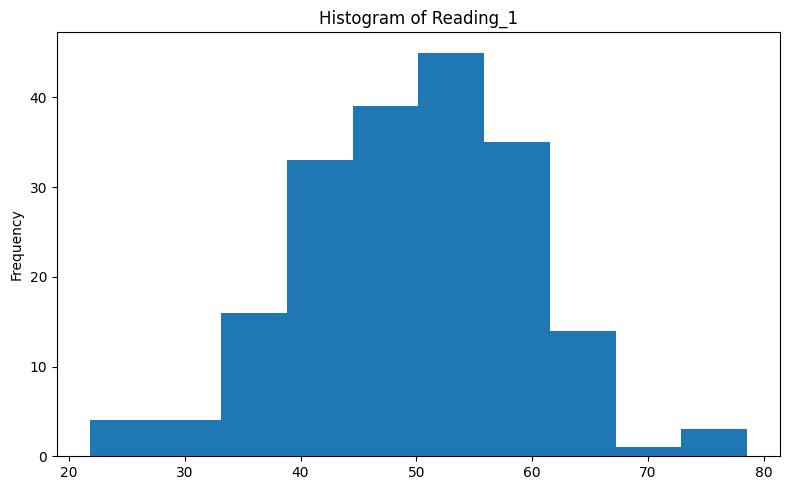

Displaying plot for column: Metric_A


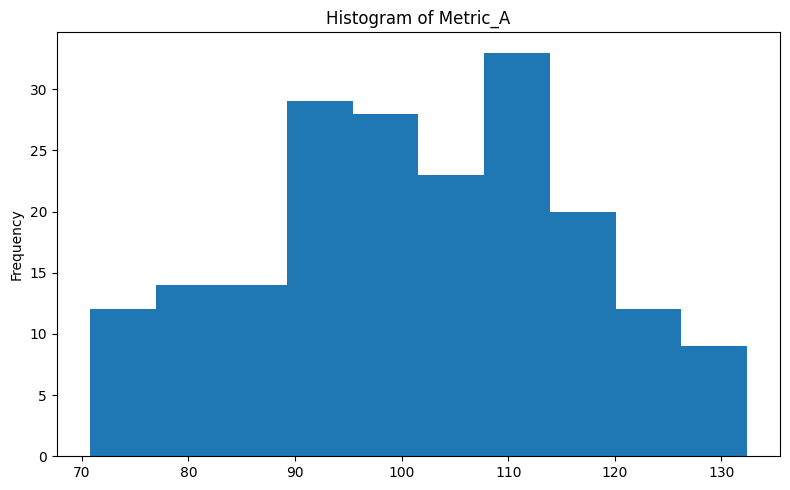

Displaying plot for column: Time_Spent


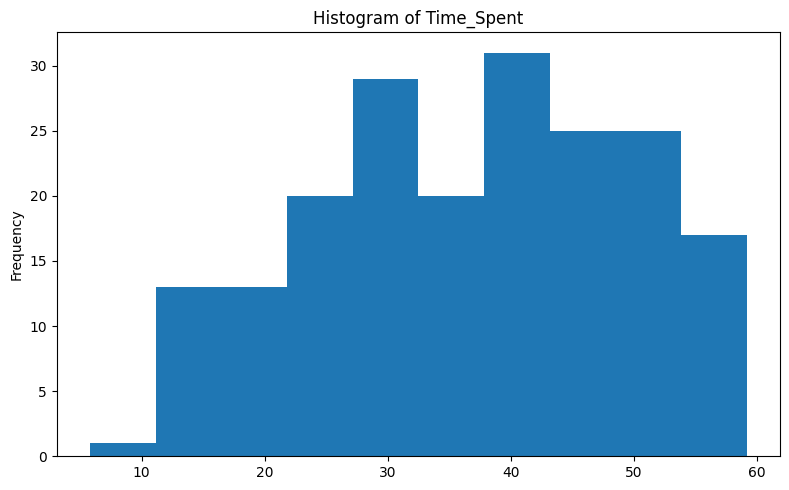

Displaying plot for column: Sensor_Type
(Column 'Sensor_Type' is categorical, showing bar chart of value counts)


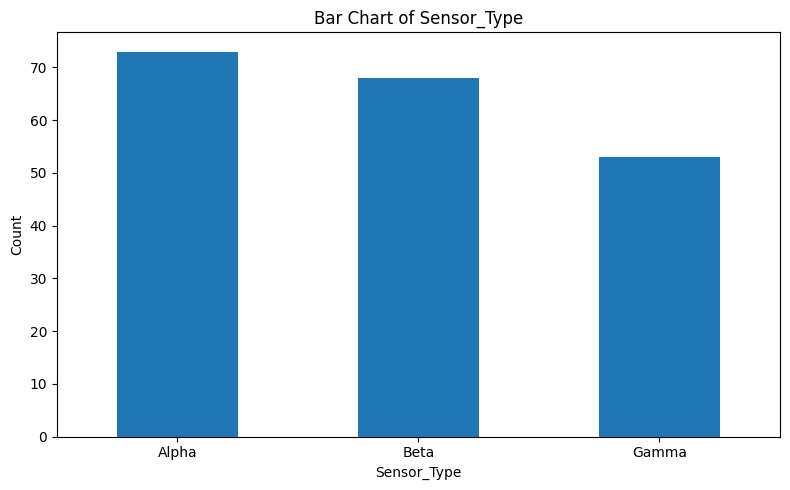

Displaying plot for column: Status


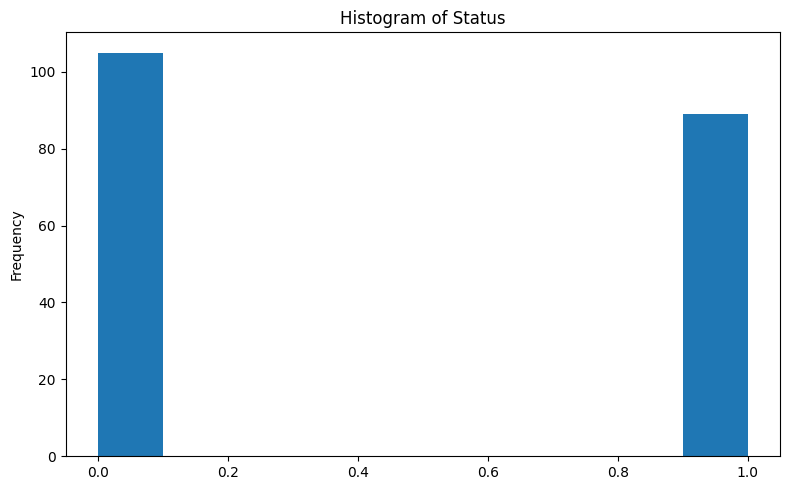

In [4]:
columns_to_plot = df.columns

for col in columns_to_plot:
    print(f"Displaying plot for column: {col}")

    # Create a new figure for each plot to show them separately
    plt.figure(figsize=(8, len(columns_to_plot)))

    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].plot(kind="hist", title=f"Histogram of {col}")
    else:
        # For categorical columns, use the bar chart
        print(f"(Column '{col}' is categorical, showing bar chart of value counts)")
        df[col].value_counts().plot(kind="bar", title=f"Bar Chart of {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

In [5]:
# One-hot encode the "Sensor_Type" column

one_hot = pd.get_dummies(df["Sensor_Type"], dtype=np.int32)
df.drop(columns="Sensor_Type", axis=1, inplace=True)
df = df.join(one_hot)
df.head()

,Reading_1,Metric_A,Time_Spent,Status,Alpha,Beta,Gamma
0,44.61,92.05,58.09,1,0,0,1
1,60.69,129.60,34.63,0,0,1,0
2,48.18,116.82,26.03,0,1,0,0
3,44.85,90.09,38.66,0,1,0,0
4,58.96,91.11,39.01,1,0,0,1


### Data splitting

In [6]:
# Extract the labels and features from the created dataset

y = df["Status"]
df.drop(columns="Status", inplace=True)
X = df

X, y

(     Reading_1  Metric_A  Time_Spent  Alpha  Beta  Gamma
 0        44.61     92.05       58.09      0     0      1
 1        60.69    129.60       34.63      0     1      0
 2        48.18    116.82       26.03      1     0      0
 3        44.85     90.09       38.66      1     0      0
 4        58.96     91.11       39.01      0     0      1
 ..         ...       ...         ...    ...   ...    ...
 189      56.10    117.02       43.06      0     0      1
 190      47.54    100.66       47.24      0     1      0
 191      53.81     73.31       19.39      1     0      0
 192      55.18    100.21       22.38      1     0      0
 193      51.59    123.09       53.25      0     1      0
 
 [194 rows x 6 columns],
 0      1
 1      0
 2      0
 3      0
 4      1
       ..
 189    1
 190    1
 191    1
 192    0
 193    0
 Name: Status, Length: 194, dtype: int64)

In [7]:
# Split the data into testing and training sets (use 20/80 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((155, 6), (39, 6))

In [8]:
tree_classifier = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=2)

In [9]:
# Train the model

tree_classifier.fit(X=X_train, y=y_train)
y_pred = tree_classifier.predict(X=X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.8974358974358975
Precision: 0.9375
Recall: 0.8333333333333334
F1: 0.8823529411764706


#### Testing different models

In [10]:
# Declare new models with different tree hyperparameters

tree_classifier_test_1 = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=4)

tree_classifier_test_1.fit(X=X_train, y=y_train)
y_pred_test_1 = tree_classifier_test_1.predict(X=X_test)

accuracy_test_1 = accuracy_score(y_true=y_test, y_pred=y_pred_test_1)
precision_test_1 = precision_score(y_true=y_test, y_pred=y_pred_test_1)
recall_test_1 = recall_score(y_true=y_test, y_pred=y_pred_test_1)
f1_test_1 = f1_score(y_true=y_test, y_pred=y_pred_test_1)

print(f"Accuracy: {accuracy_test_1}")
print(f"Precision: {precision_test_1}")
print(f"Recall: {recall_test_1}")
print(f"F1: {f1_test_1}")

Accuracy: 0.9230769230769231
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1: 0.918918918918919


In [11]:
tree_classifier_test_2 = DecisionTreeClassifier(criterion="log_loss", max_depth=1, min_samples_split=8)

tree_classifier_test_2.fit(X=X_train, y=y_train)
y_pred_test_2 = tree_classifier_test_2.predict(X=X_test)

accuracy_test_2 = accuracy_score(y_test, y_pred_test_2)
precision_test_2 = precision_score(y_true=y_test, y_pred=y_pred_test_2)
recall_test_2 = recall_score(y_true=y_test, y_pred=y_pred_test_2)
f1_test_2 = f1_score(y_true=y_test, y_pred=y_pred_test_2)

print(f"Accuracy: {accuracy_test_2}")
print(f"Precision: {precision_test_2}")
print(f"Recall: {recall_test_2}")
print(f"F1: {f1_test_2}")

Accuracy: 0.7948717948717948
Precision: 0.75
Recall: 0.8333333333333334
F1: 0.7894736842105263


#### Porównanie wpływów hiperparametrów na wyniki modeli

Model 2 okazał się najbardziej jakościowym modelem spośród testowanych modeli.

Prawdopodobnie jest to spowodowane podwyższonym limitem głębokości drzewa (hiperparametr. max_depth), co sprzyjało pozytywnie na wynik modelu na wygenerowanym zbiorze danych.

Model był w stanie wykryć "głębsze" zależności pomiędzy danymi w przekazanym zbiorze.

### LogisticRegresstion alternative

In [12]:
# Split the data in the same way, using the original X, and y extracted from the loaded dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((155, 6), (39, 6))

In [13]:
# Declare the Logistic Regstssion model

logistic_regression = LogisticRegression()

logistic_regression.fit(X=X_train, y=y_train)
y_pred_regression = logistic_regression.predict(X=X_test)

accuracy_regression = accuracy_score(y_test, y_pred_regression)
precision_regression = precision_score(y_true=y_test, y_pred=y_pred_regression)
recall_regression = recall_score(y_true=y_test, y_pred=y_pred_regression)
f1_regression = f1_score(y_true=y_test, y_pred=y_pred_regression)

print(f"Accuracy: {accuracy_regression}")
print(f"Precision: {precision_regression}")
print(f"Recall: {recall_regression}")
print(f"F1: {f1_regression}")

Accuracy: 0.9487179487179487
Precision: 1.0
Recall: 0.8888888888888888
F1: 0.9411764705882353


In [14]:
print(f"Best Tree model's accuracy was higher than or equal to the regression model: {accuracy_test_1 >= accuracy_regression}")

Best Tree model's accuracy was higher than or equal to the regression model: False


In [15]:
print(f"Tree Precision was higher: {precision_test_1 >= precision_regression}")
print(f"Tree Recall was higher or equal: {recall_test_1 >= recall_regression}")
print(f"Tree F1 Score was higher or equal: {f1_test_1 >= f1_regression}")

Tree Precision was higher: False
Tree Recall was higher or equal: True
Tree F1 Score was higher or equal: False


#### Pytania:

1. Który model uzyskał wyższe accuracy?
2. Jak wyglądają pozostałe miary?

#### Odpowiedzi:

Dla zbioru danych (problemu klasyfikacji), który wygenerował Gemini:
1. Modele drzewa osiągnęły gorsze rezultaty, niż model regresji liniowej (~92% acc. vs. ~94% acc.)
2. Wykorzystując do porównania metryk rezultaty najlepszego modelu drzewa, można wywnioskować, że model drzewa poradził sobie lepiej z:
   1. Metryką Recall -- model drzewa był w stanie lepiej zidentyfikować pozytywne prawdziwe wartości

#### Wyjaśnienie różnic pomiędzy wynikami modeli

Istnieje prawdopodobieństwo, że wygenerowany zbiór jest tak prosty, że przedstawiony w nim problem klasyfikacji można łatwiej rozwiązać, wykorzystując do tego model liniowy, który odpowiednio dopasuje się do danych w zbiorze. W przypadku danych, które można odseparować liniowo, zdarza się, że modele regresji poradzą sobie lepiej, niż modele drzew, które łatwo mogą przeuczyć się zależności w małych i nieskomplikowanych zbiorach, co może skutkować niższym wynikiem metryki accuracy.

### GridSearchCV

In [16]:
# Define the GridSearch params and the model

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [1, 3, 6, 12],
    "min_samples_split": [2, 4, 8, 16],
    "min_samples_leaf": [1, 3, 4, 6],
}

model = DecisionTreeClassifier()

In [17]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="accuracy")

In [18]:
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}")

Best params: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [19]:
final_model = DecisionTreeClassifier(criterion=grid.best_params_["criterion"], max_depth=grid.best_params_["max_depth"], min_samples_split=grid.best_params_["min_samples_split"], min_samples_leaf=grid.best_params_["min_samples_leaf"])

In [20]:
final_model.fit(X_train, y_train)
y_pred_tree = final_model.predict(X_test)

final_model_accuracy_tree = accuracy_score(y_true=y_test, y_pred=y_pred_tree)
final_model_precision_tree = precision_score(y_true=y_test, y_pred=y_pred_tree)
final_model_recall_tree = recall_score(y_true=y_test, y_pred=y_pred_tree)
final_model_f1_tree = f1_score(y_true=y_test, y_pred=y_pred_tree)

print(f"Final model Accuracy: {final_model_accuracy_tree}")
print(f"Final model Precision: {final_model_precision_tree}")
print(f"Final model Recall: {final_model_recall_tree}")
print(f"Final model F1: {final_model_f1_tree}")

Final model Accuracy: 0.9487179487179487
Final model Precision: 0.9444444444444444
Final model Recall: 0.9444444444444444
Final model F1: 0.9444444444444444


In [21]:
# Define the param grid and the model for the LogisticRegression model

param_grid = {
    "penalty": ["l2"],
    "C": [1.0, 2.0, 5.0],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky"]
}

model = LogisticRegression()

In [22]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="accuracy")

In [23]:
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}")

Best params: {'C': 2.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [24]:
final_model = LogisticRegression(penalty=grid.best_params_["penalty"], C=grid.best_params_["C"], solver=grid.best_params_["solver"])

In [25]:
final_model.fit(X_train, y_train)
y_pred_regression = final_model.predict(X_test)

final_model_accuracy_regression = accuracy_score(y_true=y_test, y_pred=y_pred_regression)
final_model_precision_regression = precision_score(y_true=y_test, y_pred=y_pred_regression)
final_model_recall_regression = recall_score(y_true=y_test, y_pred=y_pred_regression)
final_model_f1_regression = f1_score(y_true=y_test, y_pred=y_pred_regression)

print(f"Final model Accuracy: {final_model_accuracy_regression}")
print(f"Final model Precision: {final_model_precision_regression}")
print(f"Final model Recall: {final_model_recall_regression}")
print(f"Final model F1: {final_model_f1_regression}")

Final model Accuracy: 0.9230769230769231
Final model Precision: 0.9411764705882353
Final model Recall: 0.8888888888888888
Final model F1: 0.9142857142857143


In [26]:
print(f"Best GridSearchCV Tree model outperformed the LinearRegression model: {final_model_accuracy_tree > final_model_accuracy_regression}")

Best GridSearchCV Tree model outperformed the LinearRegression model: True


In [27]:
print(f"Final Tree model's Precision was higher: {final_model_precision_tree > final_model_precision_regression}")
print(f"Final Tree model's Recall was higher: {final_model_recall_tree > final_model_recall_regression}")
print(f"Final Tree model's F1 Score was higher: {final_model_f1_tree > final_model_f1_regression}")

Final Tree model's Precision was higher: True
Final Tree model's Recall was higher: True
Final Tree model's F1 Score was higher: True
